In [1]:
import sys
import lightkurve as lk
if not '../src' in sys.path:
    sys.path.insert(0, '../src')

from tesscentroidvetting import centroid_vetting, show_transit_margins
#
# def centroid_vetting(tpf, epochs, transit_dur, plot=True, **kwargs):
#
#    Miinimum Parameters: tpf - Target Pixel File
#                         epochs - [list] of transits to analyse
#                         transit_dur_tot     - [float] Total transit duration in days
#    Optional parameters: plot                - [boolean] default = True
#                         plot_flux_centroid  - [boolean] default = False 
#                         intransit_margin    - (days) [float]   default = transit_dur * 0.4
#                         ootransit_inner     - (days) [float]   default = transit_dur * 0.75
#                         ootransit_outer     - (days) [float]   default = oot_inner_margin + transit_dur
#                    
#    In transit times    : Epoch(s) ± in_transit_margin
#    Out of transit times: Between <Epoch(s) ± oot_outer_margin>  and  <Epoch(s) ± oot_inner_margin>
#
# def show_transit_margins(tpf, epoch, transit_dur, interact=False, **kwargs):
#    As in centroid_vetting

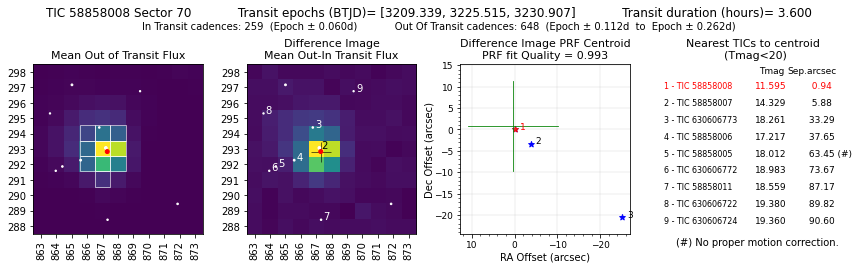

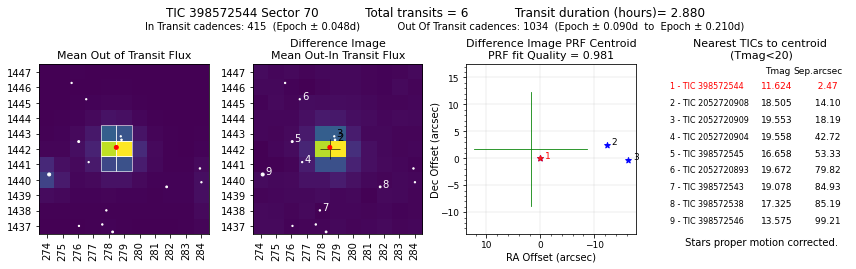

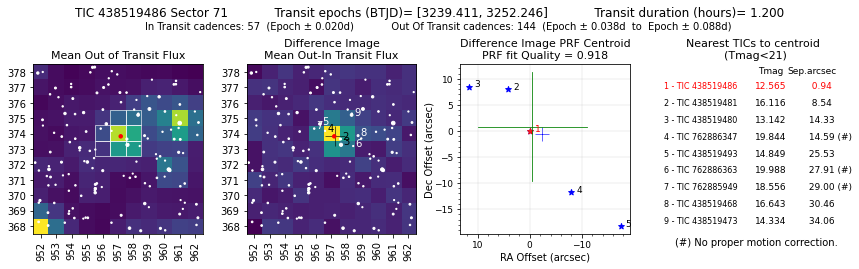

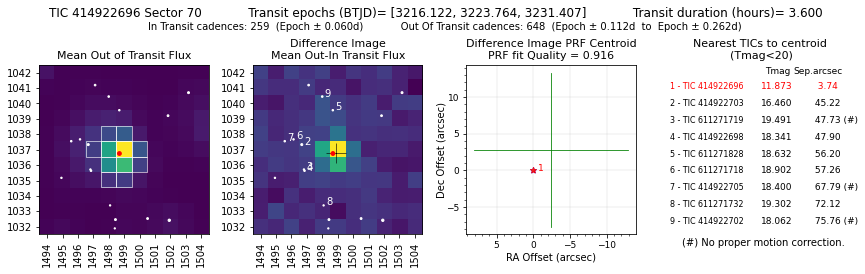

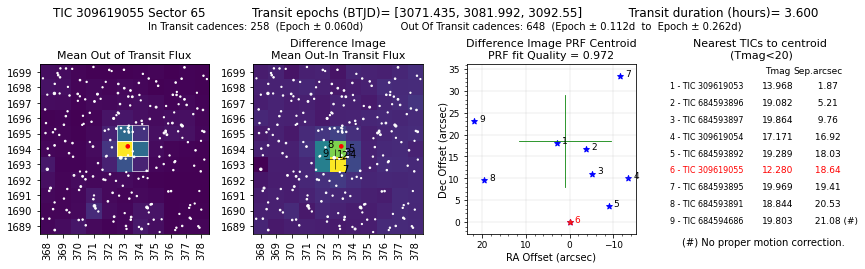

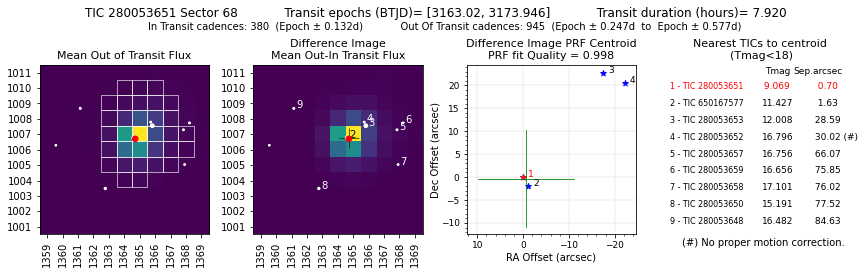

In [2]:
for r in range(6):
    if r==0:
        # TOI 6842.01 Planet candidate https://www.zooniverse.org/projects/nora-dot-eisner/planet-hunters-tess/talk/2112/3183841
        TIC_ID = 58858008
        sector = 70    
        ttimes = [3209.3388, 3225.5151, 3230.9072]
        tot_dur = 0.15
    if r == 1:
        # WASP28-B  Confirmed Planet https://www.zooniverse.org/projects/nora-dot-eisner/planet-hunters-tess/talk/2112/3184216
        TIC_ID = 398572544   #wasp28-B 
        sector = 70
        ttimes = [3209.352289,3212.761298,3216.170306,3222.988322,3226.397330,3229.806344]
        tot_dur = 0.12
    if r == 2:
        # TOI 5403.01 Planet candidate https://www.zooniverse.org/projects/nora-dot-eisner/planet-hunters-tess/talk/2112/3203688
        TIC_ID = 438519486
        sector = 71
        ttimes = [3239.411204, 3252.246261]
        tot_dur = 0.05
    if r == 3:
        #   https://www.zooniverse.org/projects/nora-dot-eisner/planet-hunters-tess/talk/2112/3190029?comment=5243900&page=1
        TIC_ID = 414922696
        sector = 70
        ttimes = [3216.121833, 3223.764306, 3231.406779]
        tot_dur = 0.15
    if r == 4:
        # NEB  https://www.zooniverse.org/projects/nora-dot-eisner/planet-hunters-tess/talk/2112/3080388
        TIC_ID = 309619055
        sector = 65
        ttimes = [3071.435318, 3081.99241, 3092.549500]
        tot_dur = 0.15    
    if r == 5:
        # EB or NEB https://www.zooniverse.org/projects/nora-dot-eisner/planet-hunters-tess/talk/2112/3111229
        TIC_ID = 280053651
        sector = 68
        ttimes= [3163.019622, 3173.946100]
        tot_dur = 0.33

    TICstr = 'TIC '+str(TIC_ID)
  
    sres = lk.search_targetpixelfile(TICstr, sector=sector, mission='TESS', author='SPOC',exptime=120)
    tpf = sres[0].download()
    if r == 2:
        results = centroid_vetting(tpf, ttimes, tot_dur, plot_flux_centroid = True)
    else:
        #####
        results = centroid_vetting(tpf, ttimes, tot_dur)
        #####

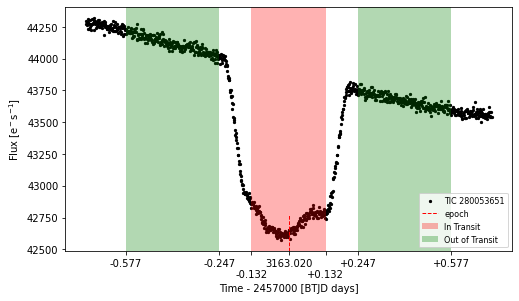

In [3]:
# 
show_transit_margins(tpf, ttimes[0], tot_dur, interact=False)

In [4]:
#
a, b, c = show_transit_margins(tpf, ttimes[0], tot_dur, interact=True)

Output()

In [5]:
a.value, b.value, c.value

(0.14, 0.236, 0.523)